In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('iris.csv')

In [14]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
X = df.drop('Species', axis='columns')
Y = df['Species']

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train , y_test = train_test_split(X,Y,test_size=0.25, random_state=23)

In [10]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=10)

In [11]:
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [16]:
model.score(X_test, y_test)

1.0

## Working with different Data

In [17]:
data = pd.read_csv('banking.csv')

In [18]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,...,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0


In [19]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

<AxesSubplot:>

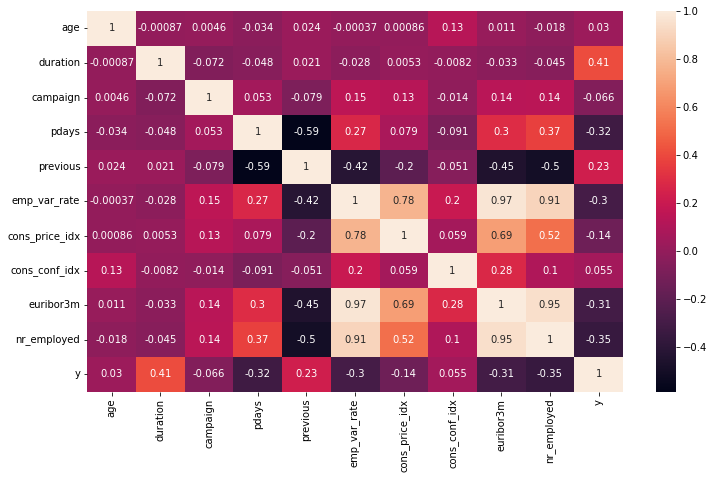

In [21]:
corr = data.corr()

plt.figure(figsize=(12,7))
sns.heatmap(corr,annot=True)

In [23]:
#We see that for column emp_var_rate and euribor3m the correlation is greater than equal to 95%. So, lets drop these two columns

data = data.drop(['emp_var_rate','euribor3m'], axis='columns')

In [24]:
dummies = pd.get_dummies(data)

In [26]:
data_X = dummies.drop(['y'], axis='columns')
data_Y = dummies['y']

In [28]:
from sklearn.model_selection import train_test_split

X_trainn, X_testn, y_trainn , y_testn = train_test_split(data_X,data_Y,test_size=0.25, random_state=23)

In [37]:
from sklearn.ensemble import RandomForestClassifier

new_model = RandomForestClassifier(n_estimators=100)

new_model.fit(X_trainn, y_trainn)

RandomForestClassifier()

In [38]:
new_model.score(X_testn , y_testn)

0.9158007186559192